1. 폴더에 있는 데이터를 train, validation으로 가져오는 방법
 
 train용
 C:\petimage\archive\training_set\training_set\dogs
 C:\petimage\archive\training_set\training_set\cats
 
 validation용
 C:\petimage\archive\test_set\test_set\dogs
 C:\petimage\archive\test_set\test_set\cats

In [4]:
import os
import cv2
from keras.preprocessing.image import ImageDataGenerator
import tensorflow.keras as keras

img_w, img_h = 150, 150
batch_size = 32

train_datagen = ImageDataGenerator(
        rescale=1.0/255,
        rotation_range=15,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1.0/255)  #RGB 범위를 0~1로 변경

train_generator = train_datagen.flow_from_directory(
        'C:\\petimage\\archive\\training_set\\training_set',
        target_size=(img_w, img_h),
        batch_size=batch_size,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        'C:\\petimage\\archive\\test_set\\test_set',
        target_size=(img_w, img_h),
        batch_size=batch_size,
        class_mode='binary')

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [8]:
model = keras.models.load_model('catdog_model.h5')
model.summary()

model.fit(
        train_generator,
        epochs=20,
        validation_data=validation_generator)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [ ]:
#원본 이미지 회전, 확대, 반전 등의 확장 처리를 모두 150*150 픽셀로 리사이즈한 것을
#flow_from_directory() 메소드가 저장되어 있는 하위 디렉토리에서 생성할 수도 있지만
# 자동으로 생성되어 진행된다.

#CNN을 확률 dogs(1)이 된다.  판정할 경우 0.5를 임계값으로 가진다.
#0.5 미만이면 cats 0.5 이상이면 dogs가 된다.

print(train_generator.class_indices)
print(validation_generator.class_indices)

In [ ]:
#모델의 컴파일 수행
model.compile(loss = "binary_crossentropy", metrics = ['accuracy'], optimizer = "adam")
model.summary()

In [ ]:
# step 2   평가 단계(학습단계)

history = model.fit_generator(train_generator,
                             epochs = 1,
                             validation_data = validation_generator,
                             )


In [ ]:
#step 3 : 응용단계
#예측값 까지 확인
#이미지가져와서 numpy 리턴하는 이미지로 예측률을 확인 해보자.

1. RNN 개념이해 _ 주가, 음성데이터, 음악, 문서, 기상

2. RNN 간단한 코드로 확인

3. RNN 모델을 이용한 검증, 예측률

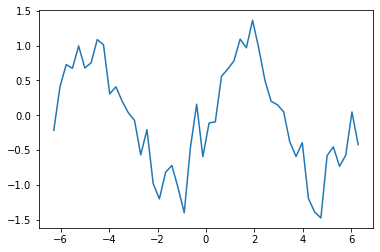

In [22]:
#RNN - 1
import numpy as np
import matplotlib.pyplot as plt

x_data = np.linspace(-2 * np.pi, 2 * np.pi)  #일반범위 값

sin_data = np.sin(x_data) + 0.3 * np.random.randn(len(x_data))  #난수로 노이즈 더한 값

plt.plot(x_data, sin_data)

plt.show()  #그래프확인 하게 되면 노이즈부분이 플롯 된 것을 확인

In [23]:
#RNN -1 -2 입력 데이터와 정답데이터 작성
n_rnn = 15  #시계열 수

n_sample = len(x_data)-n_rnn  #샘플 50 - 15 = 35
i_data = np.zeros((n_sample, n_rnn))  #입력
c_data = np.zeros((n_sample, n_rnn))  #정답


for i in range(0, n_sample):
    i_data[i] = sin_data[i:i+n_rnn]  # x_data(데이터 수 : 50)
    c_data[i] = sin_data[i+1:i+n_rnn+1]
    print(i_data)

[[-0.21514886  0.41035856  0.72667764  0.67459219  0.99517738  0.6786992
   0.75237642  1.0864619   1.01175912  0.30660217  0.40845783  0.20256423
   0.03561862 -0.0751212  -0.56838095]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0

In [24]:
i_data = i_data.reshape(n_sample, n_rnn, 1)  #keras원형 RNN 입력데이터 형식
c_data = c_data.reshape(n_sample, n_rnn, 1)
i_data.shape

(35, 15, 1)

RNN -1 -3
SimpleRNN : 전체 계층 중 중간층으로 재귀된다.
LSTM : 복잡한 시계열 데이터 처리, 학습시간이 오래걸림
GRU : LSTM의 단순버전으로 매개변수가 적기때문에 학습기간이 오래 걸리지 않음

In [25]:
#RNN -1 -3
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

batch_size = 5  # 배치크기
n_in = 1  #입력층 크기
n_mid = 20  #중간층
n_out = 1  #출력층

In [26]:
model = Sequential()
#SimpleRNN의 activation의 기본값 tanh 설정, input_shape(15-시계열 수, 1_뉴런수)
model.add(SimpleRNN(n_mid, input_shape = (n_rnn, n_in), return_sequences = True))
model.add(Dense(n_out, activation = "linear"))
model.compile(loss = "mean_squared_error", optimizer = "sgd")
print(model.summary())
#SimpleRNN = Param = 440
# 입력가중치 = 입력의 차수 * 숨어있는 차수 = 1 * 20
# 숨겨진 값 = 히든차수 * 히든차수 = 20 * 20
# 바이어스 = 히든 차수 = 20
print("========================================")
print(len(model.layers[0].get_weights()))
i_w, h_w, bias = model.layers[0].get_weights()
print(i_w.size, h_w.size, bias.size)  #20,400,20

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_3 (SimpleRNN)     (None, 15, 20)            440       
_________________________________________________________________
dense_3 (Dense)              (None, 15, 1)             21        
Total params: 461
Trainable params: 461
Non-trainable params: 0
_________________________________________________________________
None
3
20 400 20


In [27]:
##RNN -1 -4 RNN 모델을 이용한 학습하기
history = model.fit(i_data, c_data, epochs = 100,
                   batch_size = batch_size, validation_split = 0.1)

Epoch 1/100
7/7 [==============================] - 1s 47ms/step - loss: 0.4178 - val_loss: 0.2446
Epoch 2/100
7/7 [==============================] - 0s 8ms/step - loss: 0.2239 - val_loss: 0.1904
Epoch 3/100
7/7 [==============================] - 0s 8ms/step - loss: 0.1761 - val_loss: 0.1713
Epoch 4/100
7/7 [==============================] - 0s 8ms/step - loss: 0.1571 - val_loss: 0.1621
Epoch 5/100
7/7 [==============================] - 0s 8ms/step - loss: 0.1518 - val_loss: 0.1579
Epoch 6/100
7/7 [==============================] - 0s 9ms/step - loss: 0.1429 - val_loss: 0.1544
Epoch 7/100
7/7 [==============================] - 0s 8ms/step - loss: 0.1386 - val_loss: 0.1506
Epoch 8/100
7/7 [==============================] - 0s 8ms/step - loss: 0.1412 - val_loss: 0.1494
Epoch 9/100
7/7 [==============================] - 0s 8ms/step - loss: 0.1386 - val_loss: 0.1449
Epoch 10/100
7/7 [==============================] - 0s 8ms/step - loss: 0.1386 - val_loss: 0.1432
Epoch 11/100
7/7 [==========

7/7 [==============================] - 0s 7ms/step - loss: 0.0971 - val_loss: 0.1142
Epoch 85/100
7/7 [==============================] - 0s 8ms/step - loss: 0.0996 - val_loss: 0.1164
Epoch 86/100
7/7 [==============================] - 0s 7ms/step - loss: 0.1037 - val_loss: 0.1158
Epoch 87/100
7/7 [==============================] - 0s 8ms/step - loss: 0.0964 - val_loss: 0.1150
Epoch 88/100
7/7 [==============================] - 0s 8ms/step - loss: 0.1006 - val_loss: 0.1148
Epoch 89/100
7/7 [==============================] - 0s 8ms/step - loss: 0.1005 - val_loss: 0.1140
Epoch 90/100
7/7 [==============================] - 0s 8ms/step - loss: 0.1021 - val_loss: 0.1147
Epoch 91/100
7/7 [==============================] - 0s 9ms/step - loss: 0.1002 - val_loss: 0.1151
Epoch 92/100
7/7 [==============================] - 0s 9ms/step - loss: 0.1028 - val_loss: 0.1138
Epoch 93/100
7/7 [==============================] - 0s 8ms/step - loss: 0.1044 - val_loss: 0.1142
Epoch 94/100
7/7 [===============

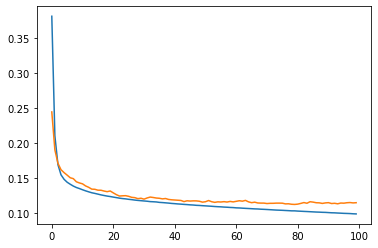

In [28]:
# RNN -1 -5 시각화
loss = history.history['loss']
vloss = history.history['val_loss']

plt.plot(np.arange(len(loss)),loss)
plt.plot(np.arange(len(vloss)),vloss)
plt.show()

In [29]:
# RNN -1 -6 예측률
# i_data  = x_data(데이터 개수 : 50)
# i_data.shape(35,15,1)
predicted = i_data[0].reshape(-1)  #입력 데이터의 첫번째 행렬을 1차원벡터
predicted

array([-0.21514886,  0.41035856,  0.72667764,  0.67459219,  0.99517738,
        0.6786992 ,  0.75237642,  1.0864619 ,  1.01175912,  0.30660217,
        0.40845783,  0.20256423,  0.03561862, -0.0751212 , -0.56838095])

In [ ]:
for i in range(0, n_sample):
    y = model.predict(predicted[-n_rnn:].reshape(1, n_rnn,1))
    predicted = np.append(predicted, y[0][n_rnn - 1][0])

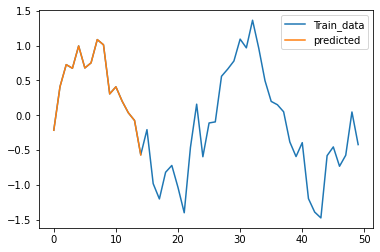

In [30]:
# 추가 데이터_예측률 시각화
plt.plot(np.arange(len(sin_data)), sin_data, label = "Train_data")
plt.plot(np.arange(len(predicted)), predicted, label = "predicted")
plt.legend()
plt.show()